### Box Office Prediction Models

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 70)
import seaborn as sns
sns.set() 

import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
clean_film = pd.read_csv("box_office_predictions_v2.csv")

In [3]:
clean_film.head()

,Unnamed: 0,budget,gross,runtime,score,votes,country_USA,genre_Comedy,star_ranking_famous,studio_ranking_least_known,roi
0,0,237000000,760507625,162,7.8,958400,0,0,1,0,1
1,1,8500000,28563926,85,5.0,17155,1,0,1,1,1
2,2,11000000,28864707,91,4.8,10674,1,1,1,1,1
3,3,15000000,29106737,111,6.0,16576,1,1,1,1,1
4,4,15000000,17237244,122,6.8,62915,0,0,0,1,1


In [4]:
clean_film = clean_film.drop('Unnamed: 0', axis = 1)

In [5]:
clean_film.shape

(6000, 10)

In [6]:
clean_film.roi.value_counts()

0    3628
1    2372
Name: roi, dtype: int64

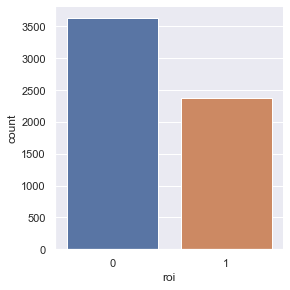

In [7]:
sns.factorplot(x='roi', data=clean_film, kind='count', size=4, aspect=1);

In [8]:
clean_film.columns

Index(['budget', 'gross', 'runtime', 'score', 'votes', 'country_USA',
       'genre_Comedy', 'star_ranking_famous', 'studio_ranking_least_known',
       'roi'],
      dtype='object')

### Scaling on the whole data before splitting

In [9]:
# features_toscale = ['budget', 'gross', 'score', 'votes', 'genre_Comedy',
#       'star_names_most_famous', 'studio_names_top_known']

In [10]:
# from sklearn import preprocessing

# sc = clean_film[features_toscale].values 
# StandardScaler = preprocessing.StandardScaler()
# sc_scaled = StandardScaler.fit_transform(sc)
# clean_film[features_toscale] = pd.DataFrame(sc_scaled)

In [11]:
# from sklearn import preprocessing

# sc = clean_film[features_toscale].values 
# min_max_scaler = preprocessing.MinMaxScaler()
# sc_scaled = min_max_scaler.fit_transform(sc)
# clean_film[features_toscale] = pd.DataFrame(sc_scaled)

In [12]:
# clean_film.head()

### Splitting the dataset into the Training set and Test set

In [13]:
X = clean_film.drop('roi', axis = 1)
y = clean_film.roi

from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=0)

### Establishing a Baseline

In [14]:
np.unique(training_target, return_counts=True)

(array([0, 1], dtype=int64), array([2877, 1923], dtype=int64))

In [15]:
clean_film['roi'].value_counts(normalize=True)

0    0.604667
1    0.395333
Name: roi, dtype: float64

In [16]:
from sklearn.dummy import DummyClassifier
dummy_baseline = DummyClassifier(strategy="most_frequent")
dummy_baseline.fit(test_features, test_target)

test_target_pred = dummy_baseline.predict(test_features)
print(test_target_pred)

score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))


[0 0 0 ... 0 0 0]
The fraction of correct classifications is: 0.626


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dummy_baseline.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
dummy_baseline_score = accuracy_score(test_target, y_pred)
print(dummy_baseline_score)

[[751   0]
 [449   0]]
0.6258333333333334


In [18]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# training_features = sc.fit_transform(training_features)
# test_features = sc.transform(test_features)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scaling all rows for the first 4 columns

training_features.iloc[:, 0:5] =  sc.fit_transform(training_features.iloc[:, 0:5])

test_features.iloc[:, 0:5] = sc.transform(test_features.iloc[:, 0:5])

In [20]:
training_features

,budget,gross,runtime,score,votes,country_USA,genre_Comedy,star_ranking_famous,studio_ranking_least_known
3381,-0.770567,-0.588020,-1.046558,0.822664,-0.521683,1,1,0,1
31,-0.228898,-0.057331,0.250842,0.923527,0.664071,0,0,1,1
1596,0.056192,0.929382,-1.102967,0.620938,-0.059461,1,0,0,1
1386,1.424620,1.067119,0.984156,0.822664,1.097912,0,0,0,1
4237,-0.057844,-0.289441,-0.144018,-0.589418,0.086847,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4931,0.341281,-0.171075,-0.256836,-2.707542,-0.119055,1,0,0,1
3264,-0.599514,-0.588859,1.153382,0.721801,-0.492930,1,0,0,1
1653,0.284263,0.847454,-0.764514,-0.589418,-0.303437,1,0,0,1
2607,-0.485478,-0.574449,-0.426062,1.125253,-0.526613,0,0,0,1


In [21]:
test_features

,budget,gross,runtime,score,votes,country_USA,genre_Comedy,star_ranking_famous,studio_ranking_least_known
4320,0.027683,-0.186573,0.645703,0.318349,-0.362545,1,1,0,1
2006,4.902710,6.800677,-0.200427,1.932158,4.052980,1,0,0,1
5689,1.225058,-0.388005,-0.369653,-1.598049,-0.475975,1,0,0,1
472,0.084701,0.189042,0.871338,0.015760,-0.366449,1,0,0,1
1370,0.768915,1.005792,-0.482471,-0.185966,0.476150,1,0,0,1
...,...,...,...,...,...,...,...,...,...
806,-0.485478,-0.371125,0.532886,-0.085103,-0.524281,1,0,0,1
5126,1.339094,-0.495853,-0.764514,-1.698912,-0.433374,1,0,0,1
4977,0.198736,-0.029292,0.871338,0.419212,0.456483,1,0,0,1
1624,0.626370,0.832110,0.814930,-0.185966,0.955942,1,0,0,1


### Decision Tree Classification Model

In [22]:
from sklearn.tree import DecisionTreeClassifier
CART = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
CART.fit(training_features, training_target)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
CART_training_score = CART.score(training_features, training_target)
print(CART_training_score)

1.0


### Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = CART.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
CART_score = accuracy_score(test_target, y_pred)
print(CART_score)

[[740  11]
 [ 14 435]]
0.9791666666666666


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(training_features, training_target)

LogisticRegression(random_state=0)

In [26]:
LR_training_score = LR.score(training_features, training_target)
print(LR_training_score)

0.9739583333333334


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = LR.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
LR_score = accuracy_score(test_target, y_pred)
print(LR_score)

[[748   3]
 [ 39 410]]
0.965


### K-Nearest Neighbors (K-NN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(training_features, training_target)

KNeighborsClassifier()

In [29]:
KNN_training_score = KNN.score(training_features, training_target)
print(KNN_training_score)

0.9308333333333333


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = KNN.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
KNN_score = accuracy_score(test_target, y_pred)
print(KNN_score)

[[715  36]
 [ 93 356]]
0.8925


### SVM model

In [31]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(training_features, training_target)

SVC(kernel='linear', random_state=0)

In [32]:
SVM_training_score = SVM.score(training_features, training_target)
print(SVM_training_score)

0.9852083333333334


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = SVM.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
SVM_score = accuracy_score(test_target, y_pred)
print(SVM_score)

[[748   3]
 [ 19 430]]
0.9816666666666667


### Kernel SVM

In [34]:
from sklearn.svm import SVC
KSVM = SVC(kernel = 'rbf', random_state = 0)
KSVM.fit(training_features, training_target)

SVC(random_state=0)

In [35]:
KSVM_training_score = KSVM.score(training_features, training_target)
print(KSVM_training_score)

0.9585416666666666


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = KSVM.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
KSVM_score = accuracy_score(test_target, y_pred)
print(KSVM_score)

[[743   8]
 [ 51 398]]
0.9508333333333333


### Gaussian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(training_features, training_target)

GaussianNB()

In [38]:
NB_training_score = NB.score(training_features, training_target)
print(NB_training_score)

0.664375


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = NB.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
NB_score = accuracy_score(test_target, y_pred)
print(NB_score)

[[745   6]
 [348 101]]
0.705


### Random Forest Classification

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(training_features, training_target)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [41]:
RF_training_score = RF.score(training_features, training_target)
print(RF_training_score)

0.99875


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = RF.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
RF_score = accuracy_score(test_target, y_pred)
print(RF_score)

[[737  14]
 [ 28 421]]
0.965


### Boosting Model - Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier(random_state = 0)
GBM.fit(training_features, training_target)

GradientBoostingClassifier(random_state=0)

In [44]:
GBM_training_score = GBM.score(training_features, training_target)
print(GBM_training_score)

0.9952083333333334


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = GBM.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
GBM_score = accuracy_score(test_target, y_pred)
print(GBM_score)

[[739  12]
 [ 14 435]]
0.9783333333333334


### Boosting Model - Ada Boost

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ADBModel = AdaBoostClassifier(random_state=0)
ADBModel.fit(training_features, training_target)

AdaBoostClassifier(random_state=0)

In [47]:
ADBModel_training_score = ADBModel.score(training_features, training_target)
print(ADBModel_training_score)

0.9839583333333334


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = ADBModel.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
ADBModel_score = accuracy_score(test_target, y_pred)
print(ADBModel_score)

[[736  15]
 [ 14 435]]
0.9758333333333333


### Ensemble Method - Bagging

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
BModel = BaggingClassifier(tree.DecisionTreeClassifier(random_state=45))
BModel
BModel.fit(training_features, training_target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=45))

In [50]:
BModel_training_score = BModel.score(training_features, training_target)
print(BModel_training_score)

0.999375


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = BModel.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
BModel_score = accuracy_score(test_target, y_pred)
print(BModel_score)

[[741  10]
 [  9 440]]
0.9841666666666666


### X-GBoost Model

In [52]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(training_features, training_target)

[11:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
XGB_training_score = XGB.score(training_features, training_target)
print(XGB_training_score)

1.0


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = XGB.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
XGB_score = accuracy_score(test_target, y_pred)
print(XGB_score)

[[745   6]
 [  8 441]]
0.9883333333333333


### Comparing Models

In [55]:
print(" Dummy Base-Line Accuracy                              : {:.2f}%".format(dummy_baseline_score * 100))

print(" Decision Tree Training Accuracy                       : {:.2f}%".format(CART_training_score * 100))
print(" Decision Tree Prediction Accuracy                                : {:.2f}%".format(CART_score * 100))

print(" Logistic Regression Training Accuracy                 : {:.2f}%".format(LR_training_score * 100))
print(" Logistic Regression Prediction Accuracy                          : {:.2f}%".format(LR_score * 100))

print(" K-Nearest Neighbors Training Accuracy                 : {:.2f}%".format(KNN_training_score * 100))
print(" K-Nearest Neighbors Prediction Accuracy                          : {:.2f}%".format(KNN_score * 100))

print(" Support Vector Machine Training Accuracy              : {:.2f}%".format(SVM_training_score * 100))
print(" Support Vector Machine Prediction Accuracy                       : {:.2f}%".format(SVM_score * 100))

print(" Kernel Support Vector Machine Training Accuracy       : {:.2f}%".format(KSVM_training_score * 100))
print(" Kernel Support Vector Machine Prediction Accuracy                : {:.2f}%".format(KSVM_score * 100))

print(" Guassian Naive Bayes Training Accuracy                : {:.2f}%".format(NB_training_score * 100))
print(" Guassian Naive Bayes Prediction Accuracy                         : {:.2f}%".format(NB_score * 100))

print(" Random Forest Training Accuracy                       : {:.2f}%".format(RF_training_score * 100))
print(" Random Forest Prediction Accuracy                                : {:.2f}%".format(RF_score * 100))

print(" Ensemble - Gradient Boosting Training Accuracy        : {:.2f}%".format(GBM_training_score * 100))
print(" Ensemble - Gradient Boosting Prediction Accuracy                 : {:.2f}%".format(GBM_score * 100))

print(" Ensemble - AdaBoost Training Accuracy                 : {:.2f}%".format(ADBModel_training_score * 100))
print(" Ensemble - AdaBoost Prediction Accuracy                          : {:.2f}%".format(ADBModel_score * 100))

print(" Ensemble - Bagging Training Accuracy                  : {:.2f}%".format(BModel_training_score * 100))
print(" Ensemble - Bagging Prediction Accuracy                           : {:.2f}%".format(BModel_score * 100))

print(" XGBoost Training Accuracy                             : {:.2f}%".format(XGB_training_score * 100))
print(" XGBoost Prediction Accuracy                                      : {:.2f}%".format(XGB_score * 100))




 Dummy Base-Line Accuracy                              : 62.58%
 Decision Tree Training Accuracy                       : 100.00%
 Decision Tree Prediction Accuracy                                : 97.92%
 Logistic Regression Training Accuracy                 : 97.40%
 Logistic Regression Prediction Accuracy                          : 96.50%
 K-Nearest Neighbors Training Accuracy                 : 93.08%
 K-Nearest Neighbors Prediction Accuracy                          : 89.25%
 Support Vector Machine Training Accuracy              : 98.52%
 Support Vector Machine Prediction Accuracy                       : 98.17%
 Kernel Support Vector Machine Training Accuracy       : 95.85%
 Kernel Support Vector Machine Prediction Accuracy                : 95.08%
 Guassian Naive Bayes Training Accuracy                : 66.44%
 Guassian Naive Bayes Prediction Accuracy                         : 70.50%
 Random Forest Training Accuracy                       : 99.88%
 Random Forest Prediction Accuracy   

### Scores with Cross Validation

In [56]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []

models.append(('CART           ', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('LRM            ', LogisticRegression(random_state = 0, solver='newton-cg', max_iter=1000)))
models.append(('KNN            ', KNeighborsClassifier()))
models.append(('NB             ', GaussianNB()))
models.append(('SVM            ', SVC(kernel = 'linear', random_state = 0)))
models.append(('KSVM           ', SVC(kernel = 'rbf', random_state = 0)))
models.append(('RFM            ', RandomForestClassifier(n_estimators=87, random_state=123)))
models.append(('GBM            ', GradientBoostingClassifier()))
models.append(('ADBModel       ', AdaBoostClassifier()))
models.append(('BModel         ', BaggingClassifier()))
models.append(('XGB            ', XGBClassifier()))


results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART             : 0.981250 (0.002465)
LRM              : 0.969375 (0.004593)
KNN              : 0.885625 (0.012593)
NB               : 0.663750 (0.004082)
SVM              : 0.981250 (0.003953)
KSVM             : 0.950000 (0.008765)
RFM              : 0.976042 (0.004167)
GBM              : 0.982500 (0.004239)
ADBModel         : 0.971250 (0.003875)
BModel           : 0.983958 (0.004823)
[11:46:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:46:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old 

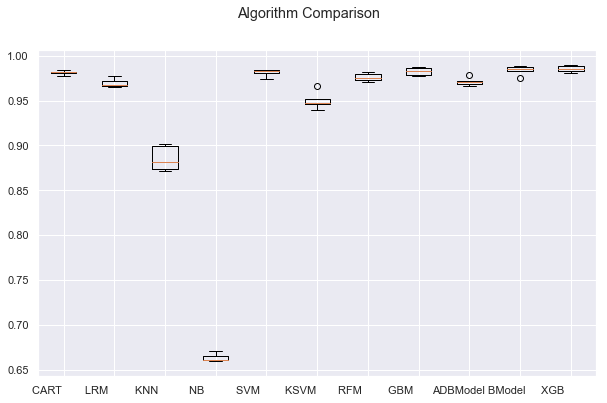

In [57]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Model Assessement

In [58]:
# For calculating AUROC
from sklearn.metrics import roc_curve, auc

[11:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


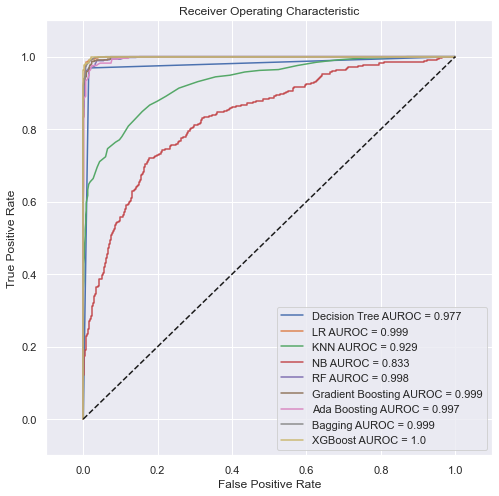

In [59]:
# Initialize plot
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')


# ---- DT---- #

# Predicts X_test using model
DTModel = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTModel.fit(training_features, training_target)
DT_pred = DTModel.predict_proba(test_features)
DT_pred = [p[1] for p in DT_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, DT_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Decision Tree', auroc))


# ---- LR ---- #

# Predicts test_features using model
LR = LogisticRegression(random_state = 0, solver='newton-cg', max_iter=1000)
LR.fit(training_features, training_target)
LR_pred = LR.predict_proba(test_features)
LR_pred = [p[1] for p in LR_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, LR_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('LR', auroc))


# ---- KNN ---- #

# Predicts test_features using model
KNN = KNeighborsClassifier(n_neighbors = 57)
KNN.fit(training_features, training_target)
KNN_pred = KNN.predict_proba(test_features)
KNN_pred = [p[1] for p in KNN_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, KNN_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('KNN', auroc))



# ---- NB---- #

# Predicts test_features using model
NB = GaussianNB()
NB.fit(training_features, training_target)
NB_pred = NB.predict_proba(test_features)
NB_pred = [p[1] for p in NB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, NB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('NB', auroc))



# ---- SVM---- #

# Predicts test_features using model
# SVM = SVC(kernel = 'linear', random_state = 0)
# SVM.fit(training_features, training_target)
# SVM_pred = SVM.predict_proba(test_features)
# SVM_pred = [p[1] for p in SVM_pred]
    
# Calculates ROC curve
# fpr, tpr, thresholds = roc_curve(test_target, SVM_pred)
    
# Calculates AUROC
# auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
# plt.plot(fpr, tpr, label='{} AUROC = {}'.format('SVM', auroc))



# ---- KSVM---- #

# Predicts test_features using model
# KSVM = SVC(kernel = 'rbf', random_state = 0)
# KSVM.fit(training_features, training_target)
# KSVM_pred = KSVM.predict_proba(test_features)
# KSVM_pred = [p[1] for p in KSVM_pred]
    
# Calculates ROC curve
# fpr, tpr, thresholds = roc_curve(test_target, KSVM_pred)
    
# Calculates AUROC
# auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
# plt.plot(fpr, tpr, label='{} AUROC = {}'.format('KSVM', auroc))



# ---- RF ---- #

# Predicts test_features using model
RF = RandomForestClassifier(n_estimators=87, random_state=42)
RF.fit(training_features, training_target)
RF_pred = RF.predict_proba(test_features)
RF_pred = [p[1] for p in RF_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, RF_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('RF', auroc))



# ---- GB ---- #

# Predicts X_test using model
GBModel = GradientBoostingClassifier()
GBModel.fit(training_features, training_target)
GB_pred = GBModel.predict_proba(test_features)
GB_pred = [p[1] for p in GB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, GB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Gradient Boosting', auroc))



# ---- ADABOOST ---- #

# Predicts X_test using model
ADAModel = AdaBoostClassifier()
ADAModel.fit(training_features, training_target)
ADAModel_pred = ADAModel.predict_proba(test_features)
ADAModel_pred = [p[1] for p in ADAModel_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, ADAModel_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Ada Boosting', auroc))



# ---- Bagging ---- #

# Predicts X_test using model
BModel = BaggingClassifier(tree.DecisionTreeClassifier(random_state=45))
BModel.fit(training_features, training_target)
BModel_pred = BModel.predict_proba(test_features)
BModel_pred = [p[1] for p in BModel_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, BModel_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Bagging', auroc))



# ---- XGBoost ---- #

# Predicts X_test using model
XGB = XGBClassifier()
XGB.fit(training_features, training_target)
XGB_pred = XGB.predict_proba(test_features)
XGB_pred = [p[1] for p in XGB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, XGB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('XGBoost', auroc))



# ---- Legend and labels ---- #

# Plot legend
plt.legend(loc='lower right')

# Plots 45 degree dotted black line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost Parameter Tuning with Random Search

In [60]:
XGB = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)


parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}



gbc_random = GridSearchCV(estimator=XGB,
param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

gbc_random.fit(training_features, training_target)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   19.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   51.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  2.1min finished


[11:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=No

In [61]:
gbc_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [62]:
gbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1) 

gbc.fit(training_features, training_target)

gbc_predict = gbc.predict(test_features)

gbc_cv_score = cross_val_score(gbc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(test_target, gbc_predict))
print('\n')

print("=== Classification Report ===")
print(classification_report(test_target, gbc_predict))
print('\n')

print("=== All AUC Scores ===")
print(gbc_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - XGBoost Model: ", gbc_cv_score.mean())

[11:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Bagging Parameter Tuning with Random Search

In [63]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in Bagging
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# number of features at every split
max_features = [7] 
# 'auto', 'sqrt'

# max depth
# max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
# max_depth.append(None)


# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features
# 'max_depth'  : max_depth
 }
# Random search of parameters
gbc_random = RandomizedSearchCV(estimator = BModel, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
gbc_random.fit(training_features, training_target)
# print results
print(gbc_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   47.5s finished


{'n_estimators': 600, 'max_features': 7}


In [64]:
gbc = BaggingClassifier(n_estimators =200, max_features= 7) 

gbc.fit(training_features, training_target)

gbc_predict = gbc.predict(test_features)

gbc_cv_score = cross_val_score(gbc, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(test_target, gbc_predict))
print('\n')

print("=== Classification Report ===")
print(classification_report(test_target, gbc_predict))
print('\n')

print("=== All AUC Scores ===")
print(gbc_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - Bagging Model: ", gbc_cv_score.mean())

=== Confusion Matrix ===
[[741  10]
 [  9 440]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       751
           1       0.98      0.98      0.98       449

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



=== All AUC Scores ===
[0.98099378 0.98582803 0.9375109  0.95991561 0.9935314  0.96874964
 0.87340029 0.96987133 0.9773105  0.91958713]


=== Mean AUC Score ===
Mean AUC Score - Bagging Model:  0.9566698600197027
